#**Building your first Neural Network with TensorFlow and Keras**

# Things to know:



## Definintion of terms

1. [***Sequential()***](https://keras.io/guides/sequential_model/): A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

2. ***Dense()***: a dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.

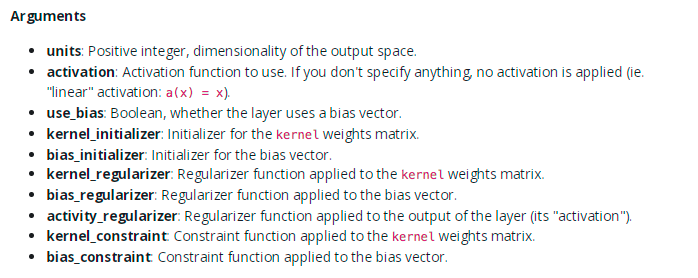

3. ***Compile()***: putting all our recipes together and making it ready for training in the next phase.

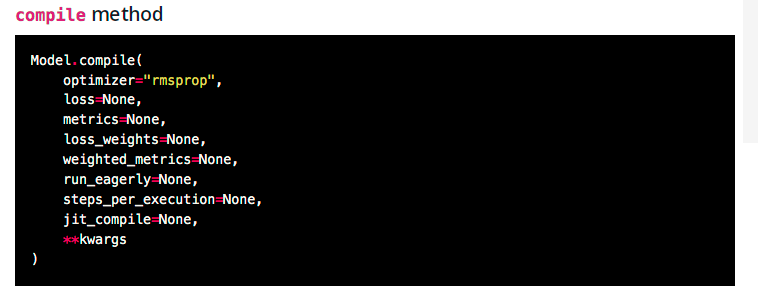

Definition of these arguments for the *compile()* method [can be found here](https://keras.io/api/models/model_training_apis/)

3. ***fit()***: Trains the model for a fixed number of epochs (iterations on a dataset).

    1. **Epoch:** One pass through all of the rows in the training dataset.
    2. **Batch:** One or more samples considered by the model within an epoch before weights are updated.


Definition of these arguments for the *fit()* method [can be found here](https://keras.io/api/models/model_training_apis/)

## What Is a Sample?
A sample is a single row of data.

It contains inputs that are fed into the algorithm and an output that is used to compare to the prediction and calculate an error.

A training dataset is comprised of many rows of data, e.g. many samples. A sample may also be called an instance, an observation, an input vector, or a feature vector.

Now that we know what a sample is, let’s define a batch.

## What Is a Batch?
The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model, e.g. move down along the error gradient.

A training dataset can be divided into one or more batches.

When all training samples are used to create one batch, the learning algorithm is called batch gradient descent. When the batch is the size of one sample, the learning algorithm is called stochastic gradient descent. When the batch size is more than one sample and less than the size of the training dataset, the learning algorithm is called mini-batch gradient descent.

1. ***Batch Gradient Descent.***: Batch Size = Size of Training Set
2. ***Stochastic Gradient Descent***: Batch Size = 1
3. ***Mini-Batch Gradient Descent***: 1 < Batch Size < Size of Training Set



In the case of mini-batch gradient descent, popular batch sizes include 32, 64, and 128 samples. You may see these values used in models in the literature and in tutorials.



###What Is an Epoch?
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.

You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.

The number of epochs is traditionally large, often hundreds or thousands, allowing the learning algorithm to run until the error from the model has been sufficiently minimized. You may see examples of the number of epochs in the literature and in tutorials set to 10, 100, 500, 1000, and larger.

## What Is the Difference Between Batch and Epoch?
The batch size is a number of samples processed before the model is updated.

The number of epochs is the number of complete passes through the training dataset.

The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

The number of epochs can be set to an integer value between one and infinity. You can run the algorithm for as long as you like and even stop it using other criteria besides a fixed number of epochs, such as a change (or lack of change) in model error over time.

They are both integer values and they are both hyperparameters for the learning algorithm, e.g. parameters for the learning process, not internal model parameters found by the learning process.

You must specify the batch size and number of epochs for a learning algorithm.

There are no magic rules for how to configure these parameters. You must try different values and see what works best for your problem.

##Worked Example
Finally, let’s make this concrete with a small example.

Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.

This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.

This also means that one epoch will involve 40 batches or 40 updates to the model.

With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.

Note the following steps in creating your neural network:

1. Define our training data
2. Create a sequential model:
3. Add layers
4. Compile our model
5. Fit our model to our training data
6. Predict values


#Building A Neural Network

#1. Load Data

Install TensorFlow and Keras

In [ ]:
!pip install tensorflow-gpu==2.0.0-alpha0

In [ ]:
!pip install keras

In [ ]:
import numpy as mp
from numpy import loadtxt
import keras
from keras.models import Sequential
from keras.layers import Dense


[Download dataset](https://drive.google.com/file/d/1DdUcghdAuQavpNBLSPPW1FJl9iYuJS-V/view?usp=sharing)

In [ ]:
dataset = loadtxt("/content/pima-indians-diabetes.data.csv",delimiter = ',')
X = dataset[:,0:8]
y= dataset[:,8]

**Note:** the dataset has 9 columns and the range 0:8 will select columns from 0 to 7, stopping before index 8.

In [ ]:
import pandas as pd

x_df =pd.DataFrame(X)
x_df

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


#2. Define Keras Model

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the ***input_dim*** argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation. Generally, you need a network large enough to capture the structure of the problem.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer:

1. The model expects rows of data with 8 variables (the input_dim=8 argument)
2. The first hidden layer has 12 nodes and uses the relu activation function.
3. The second hidden layer has 8 nodes and uses the relu activation function.
4. The output layer has one node and uses the sigmoid activation function.

In [ ]:
model = Sequential()
model.add(Dense(units = 12, input_dim=8,activation='relu'))
model.add(Dense(units=9,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

**Note** the most confusing thing here is that the shape of the input to the model is defined as an argument on the first hidden layer. This means that the line of code that adds the first Dense layer is doing 2 things, defining the input or visible layer and the first hidden layer.

#3. Compile Keras Model

Now that the model is defined, we can *compile it*(i.e we need to put all our recipe that we need together in order to get ready for training).

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

n this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as **“binary_crossentropy“.**

We will define the *optimizer* as the efficient stochastic gradient descent algorithm ***“adam“***. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.

Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the metrics argument.





In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#4. Fit Keras Model

We have defined our model and compiled it ready for efficient training.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the ***fit()*** function on the model.

Training occurs over ***epochs*** and each epoch is split into ***batches***.

1. ***Epoch:*** One pass through all of the rows in the training dataset.
2. ***Batch:*** One or more samples considered by the model within an epoch before weights are updated.


The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.

In [ ]:
model.fit(X,y,epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 7.6422 - accuracy: 0.4193
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.3949 - accuracy: 0.5195
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0401 - accuracy: 0.5729
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9505 - accuracy: 0.5885
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9039 - accuracy: 0.6055
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8155 - accuracy: 0.6133
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7714 - accuracy: 0.6263
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.6393
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7289 - accuracy: 0.6380
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6706
Epoch 11/

We can see that we have **768** records, so out of that, we choose **10** records at a time(referred to as the b*atch size*) for **1** iteration (referred to as one *Epoch*).

#5. Evaluate Keras Model

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

You can evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset.

In [ ]:
loss, accuuracy =model.evaluate(X,y)
print('Accuracy: {}\n Loss: {}'.format(accuuracy*100,loss))

24/24 [==============================] - 0s 5ms/step - loss: 0.4621 - accuracy: 0.7721
Accuracy: 77.21354365348816
 Loss: 0.4621178209781647


#7. Make Predictions

Making predictions is as easy as calling the predict() function on the model. We are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. We can easily convert them into a crisp binary prediction for this classification task by rounding them.

In [ ]:
predictions =model.predict(X)
rounded = [round(x[0]) for x in predictions]
rounded

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,


In [ ]:
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 20 cases
for i in range(20):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] => 0 (expected 0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] => 1 (expected 1)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0] => 1 (expected 0)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => 1 (expected 1)
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0] => 1 (expect